In [179]:
import os

In [180]:
# os.system("pandoc -o relatorio_part1.pdf relatório.md")

### Referencias
- sympy: https://www.youtube.com/playlist?list=PLHwXkLexR9MDJewziHzhHcEKUg4VRwUFq

In [181]:
import control
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

## Symbolic

In [182]:
s = sp.symbols("s")

L0, L1, a, m, ie, k, R, g = sp.symbols("L_0 L_1 a m i_e k R g")

In [183]:
A = sp.Matrix([[0, 1, 0],
            [L0*ie**2/(m*a**2), -k/m, -L0*ie/(m*a)],
            [0, L0*ie/((L0+L1)*a), -R/(L0+L1)]])
B = sp.Matrix([0, 0, -1/(L0+L1)])
C = sp.Matrix([[1,0,0]])
D = sp.zeros(1)

A

Matrix([
[                  0,                       1,              0],
[L_0*i_e**2/(a**2*m),                    -k/m, -L_0*i_e/(a*m)],
[                  0, L_0*i_e/(a*(L_0 + L_1)), -R/(L_0 + L_1)]])

In [184]:
G = C*(s*sp.eye(3) - A).inv()*B + D
print(sp.latex(G))
G

\left[\begin{matrix}- \frac{- L_{0}^{2} a i_{e} - L_{0} L_{1} a i_{e}}{\left(L_{0} + L_{1}\right) \left(- L_{0} L_{1} i_{e}^{2} s - L_{0} R i_{e}^{2} + L_{0} a^{2} k s^{2} + L_{0} a^{2} m s^{3} + L_{1} a^{2} k s^{2} + L_{1} a^{2} m s^{3} + R a^{2} k s + R a^{2} m s^{2}\right)}\end{matrix}\right]


Matrix([[-(-L_0**2*a*i_e - L_0*L_1*a*i_e)/((L_0 + L_1)*(-L_0*L_1*i_e**2*s - L_0*R*i_e**2 + L_0*a**2*k*s**2 + L_0*a**2*m*s**3 + L_1*a**2*k*s**2 + L_1*a**2*m*s**3 + R*a**2*k*s + R*a**2*m*s**2))]])

In [185]:
ie_res = sp.sqrt(2*a*m*g/L0)
A_eval = A.subs(ie, ie_res).subs(
    {m: 0.25, k: 10E-3, L0: 0.05, L1: 0.02, g: 9.81, a: 0.05, R: 7}
)
A_eval

Matrix([
[    0,                        1,                         0],
[392.4,                    -0.04, -6.26418390534633*sqrt(2)],
[    0, 22.3720853762369*sqrt(2),                    -100.0]])

In [186]:
A_eval.eigenvals()
# If all of the eigenvalues are negative, then the system is stable; if any single eigenvalue is positive, the system is unstable.

{18.6442731736439: 1, -21.7014478319848: 1, -96.9828253416591: 1}

In [187]:
G_eval = G.subs(ie, ie_res).subs(
    {m: 0.25, k: 10E-3, L0: 0.05, L1: 0.02, g: 9.81, a: 0.05, R: 7}
)
G_eval[0].evalf()

0.00553680864758753/(4.375e-5*s**3 + 0.00437675*s**2 - 0.00473*s - 1.71675)

## Numeric

In [188]:
m = 0.25
k = 10E-3
L0 = 0.05
L1 = 0.02
g = 9.81
a = 0.05
R = 7

ie = np.sqrt(2*a*m*g/L0)
s = control.tf("s")

In [189]:
A = [[0, 1, 0],
     [L0*ie**2/(m*a**2), -k/m, -L0*ie/(m*a)],
     [0, L0*ie/((L0+L1)*a), -R/(L0+L1)]]
B = [[0], [0], [-1/(L0+L1)]]
C = [[1,0,0]]
D = [[0]]

In [190]:
sys_ss = control.ss(A, B, C, D)
Gs = control.tf(sys_ss)
Gs

TransferFunction(array([126.55562623]), array([ 1.00000000e+00,  1.00040000e+02, -1.08114286e+02, -3.92400000e+04]))

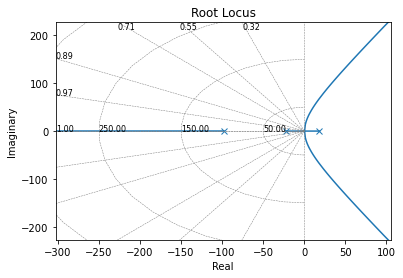

In [191]:
_ = control.root_locus(Gs)

In [192]:
Kp = 1
Kd = 1
Ki = 1

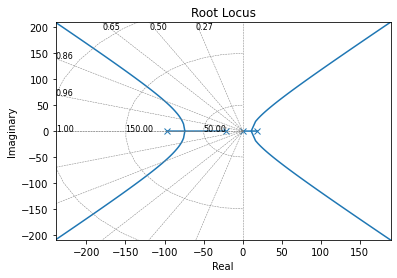

In [193]:
Cs = Ki/s
_ = control.root_locus(Cs*Gs)

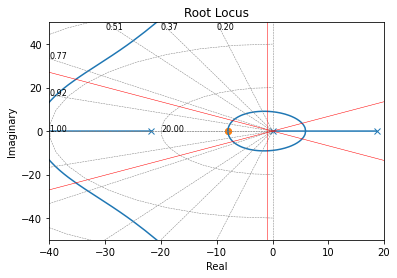

In [218]:
Ns = (s+8)**2
Ds = s*(0.008*s + 1)
Cs = (Kd/Ki)*(Ns/Ds)
roots, ks = control.root_locus(Cs*Gs, xlim = [-40, 20], ylim=[-50, 50])

# omega
plt.axvline(-1, color='r', linewidth=0.5)
plt.axline((0,0), slope=np.deg2rad(38.7), color='r', linewidth=0.5)
_ = plt.axline((0,0), slope=np.deg2rad(-38.7), color='r', linewidth=0.5)

Text(0.5, 1.0, 'Resposta em malha fechada ao degrau $r(s) = \\frac{0.02}{s}$')

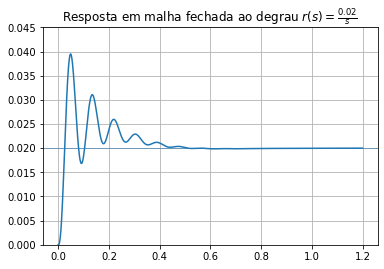

In [228]:
k_f = 78
cl = control.feedback(k_f*Cs*Gs)
plt.plot(*control.forced_response(cl, T=np.linspace(0, 1.2, num=1000), U=0.02))
plt.ylim(0, 0.045)
plt.axhline(0.02, linewidth=0.5)
plt.grid()
plt.title(r"Resposta em malha fechada ao degrau $r(s) = \frac{0.02}{s}$")


Text(0.5, 1.0, 'Esforço de controle para $r(s) = \\frac{0.02}{s}$')

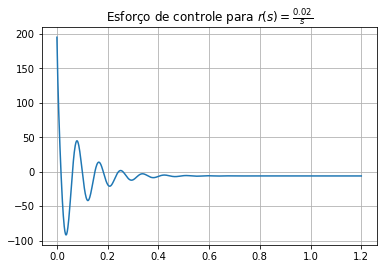

In [226]:
effort = k_f*Cs/(1 + k_f*Cs*Gs)
plt.plot(*control.forced_response(effort, T=np.linspace(0, 1.2, num=1000), U=0.02))
plt.grid()
plt.title(r"Esforço de controle para $r(s) = \frac{0.02}{s}$")


In [221]:
_ = control.damp(cl)

_____Eigenvalue______ Damping___ Frequency_
    -190.4                     1      190.4
     -10.5    +73.03j     0.1423      73.78
     -10.5    -73.03j     0.1423      73.78
    -6.811    +5.459j     0.7803      8.729
    -6.811    -5.459j     0.7803      8.729
